In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
from scipy.integrate import solve_ivp


# Playground for testing new packages

## Test the SDE Package

Consider the ODE:
$$\dot{x} = -0.5x - 2y$$
$$\dot{y} = 2x - y$$
Which can be represented in vector form as $\dot{x} = Ax \ dt$ where:
$$A = \begin{bmatrix}
-0.5 & -2\\
2 & -1 
\end{bmatrix}$$

The equivalent SDE is given by the __ito__ equation $\dot{x} = Ax \ dt + B \ dW$ where B is a diagonal matrix of scaling factors ($\sigma$)for the noise and dW is the Weiner process:
$$B = \begin{bmatrix}
0.05 & 0\\
0 & 0.05 
\end{bmatrix}$$

In [4]:
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

In [8]:
def test(t, state):
    x, y = state[0], state[1]
    dxdt = -0.5 * x - 2*y 
    dydt = 2 * x - y
    return [dxdt, dydt]
x0 = [3.0, 3.0]
dt = 0.01
t = np.arange(0, 100, dt)
t_span = (t[0], t[-1])
x = solve_ivp(test, t_span, x0, t_eval=t, **integrator_keywords).y.T

In [12]:
A = np.array(([-0.5, -2.0], [2.0, -1.0])) # ODEs in vector form
B = np.diag([0.05, 0.05]) # scaling factors for Weiner process
dt = 0.01
t = np.arange(0, 100, dt)
x0 = np.array([3.0, 3.0])
def f(x, t): # deterministic
    return A.dot(x)
def G(x, t): # stochastics
    return B
result = sdeint.itoint(f, G, x0, t)

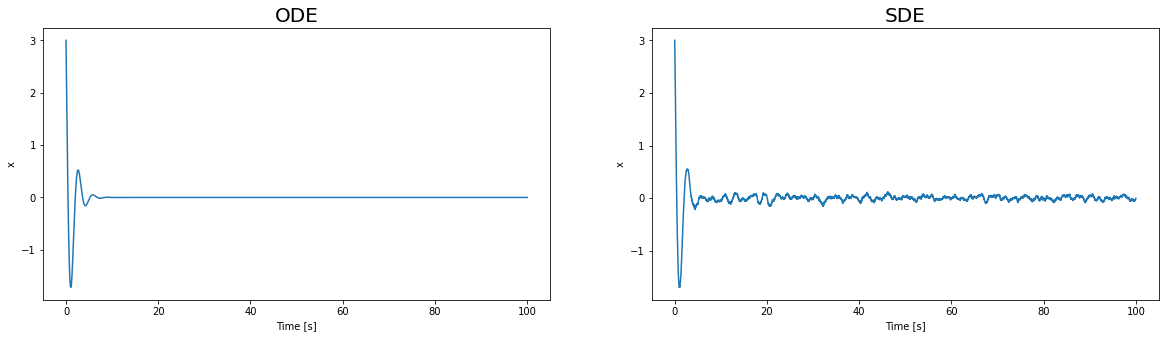

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(t,x[:,0])
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('x')
ax[0].set_title('ODE', fontsize=20)
ax[1].plot(t, result[:,0])
ax[1].set_title('SDE', fontsize=20)
ax[1].set_ylabel('x')
ax[1].set_xlabel('Time [s]')
plt.show()

#### Simulate 6 noise levels

In [27]:
Eta = [0.0, 0.01, 0.03, 0.05, 0.07, 0.1]
A = np.array(([-0.5, -2.0], [2.0, -1.0])) # ODEs in vector form
dt = 0.01
t = np.arange(0, 100, dt)
x0 = np.array([3.0, 3.0])
def f(x, t): # deterministic
    return A.dot(x)
def G(x, t): # stochastics
    return B
results = np.zeros((len(Eta), 10000))
for index, eta in enumerate(Eta):
    B = np.diag([eta, eta]) # scaling factors for Weiner process
    sol = sdeint.itoint(f, G, x0, t)
    results[index, :] = sol[:, 0]

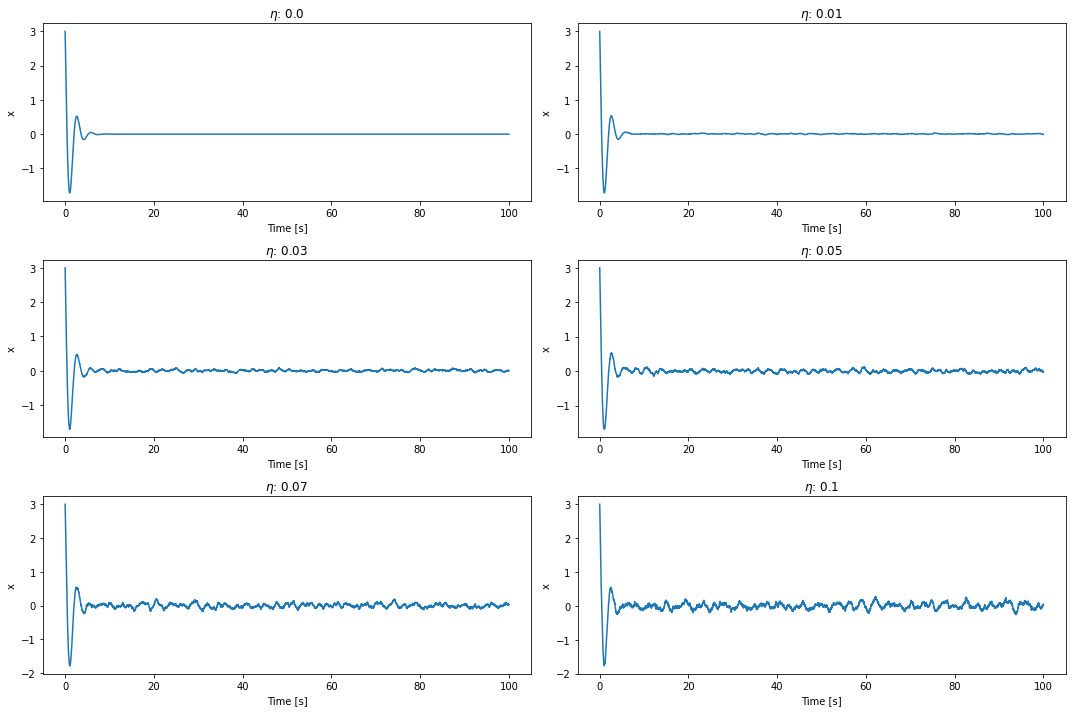

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))
for index, ax in enumerate(axes.ravel()):
    ax.plot(t, results[index, :])
    ax.set_title(f'$\eta$: {Eta[index]}')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('x')
fig.tight_layout()

## Interactive Plots

In [11]:
import ipywidgets
from sklearn.datasets import make_moons

def plot_moons(samples=200, noise=0):
    plt.figure(figsize=(15,10))
    moons = make_moons(n_samples=samples, noise=noise)
    X, y = moons[0], moons[1]
    plt.scatter(X[:,0], X[:,1], c=y)

In [12]:
ipywidgets.interact(plot_moons, samples=[200,500,1000], noise=(0,2,0.025))
plt.show()

interactive(children=(Dropdown(description='samples', options=(200, 500, 1000), value=200), FloatSlider(value=…